#DATA MADNESS GROUP 9
Student Alcohol Consumption

Link to the video : https://www.youtube.com/watch?v=FYjiSOURyAc&t=1s&ab_channel=Ad%C3%A8leI

## Introduction

### Project description



This project aims to analyse students' alcohol consumption in Maastricht University.

- Data acquisition: \
For that purpose, we decided to create a Google Form consisting of a series of questions about alcohol consumption, grades, environment plus some basic questions (age, sex, etc.). We asked Maastricht Uniersity students to complete it. We expected around 300 records of 20 features described in the datasheet provided and got 460 answers! We think this data is enough to answer our three research questions since it contains all the information needed and the chosen population is targeted (students of UM).\
Survey: https://forms.gle/wHnaVbV8iYHKGX4q6



- Research questions: \
  -How impactful is a student's alcohol consumption on his academic success ? \
  -How is the alcohol consumption distributed over the different faculties within Maastricht Unviversity? \
  -What features influence the student's academic success ? (In this case the GPA) \



- Outline Analysis: \
First of all, we need to clean the dataset obtained from our survey, and start exploring it. Afterwards, we plan to analyze first the links between the different features in a correlation matrix in order to have an overall idea of how they are related, understand their roles in the dataset and check their consistency. Then, we will look over their distributions and check whether some are normally distributed which would be beneficial for the model building.
Regarding the analysis method, we used different techniques to try to predict the drunk frequency and the alcohol consumption of a student during the week days. The different techniques will be discussed in their section and analyzed in the conclusion.

### Data description


- *age*: Int (continuous)

- *sex*: \
Male \
Female \
 Other

- *country*: Country where the user comes from

- *fac*:\
  DKE\
  MSP\
  Law\
  SBE\
  Fasos\
  UCM\
  Psychology and Neuroscience\
  Medicine and Life Sciences\
  Other

- *degree*\
  bachelor\
  master

- *living_area*\
  city center\
  outside city center

- *classes_hperweek*: Number of classes hour per week
1-4\
5-8\
9-12\
13-15\
15+
- *attendance_prct*: Attendance percentage
0-30%\
30-60%\
60-80%\
80-100%

- *sorority*: Being part of a sorority
  Yes\
  No

- *education_type*: Type of education followed by the students
On site\
Online\
Hybrid

- *study_hperweek*: Number of hours spent studying per week
0-5\
5-10\
10-15\
15-20\
20-25\
25+

- *GPA*: double, continuous value

- *resit_freq*: frequency of resit
Never\
About once a year\
About two or three times a year\
Once every period\
More than one resit every period

- *fav_studyplace*: favorite study place
Library/learning space\
Home\
Café\
Bar\
Other

- *study_env*: Study environment
Alone\
With friends\
Mix

- *weekdays_alc_cons*: alcohol consumption during the weekdays\
Scale from 0 to 5 where 0 stands for 'I dont drink' and 5 stands for 'I drink every day'

- *weekends_alc_cons*: alcohol consumption during the weekends\
Scale from 0 to 5 where 0 stands for 'I dont drink' and 5 stands for 'I drink every day'

- *drunk_freq*: frequency of being drunk
Never\
Very rarely (about once a year)\
Sometimes (about four times a year)\
About every month\
About every week\
More than once a week

- *drink*: drink of choice
Beer\
Wine\
Cocktails\
Shots\
On the rocks\
Other\
I don't drink

- *active*: How physically active \
Scale from 0 to 5 where 0 stands for 'Not active at all' and 5 stands for 'Super active'

 ### Imports

In [ ]:
!pip install interpret;
!pip install prince;

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from pandas.api.types import CategoricalDtype
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import prince

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from io import StringIO
#from sklearn.externals.six import StringIO  #will work only with 0.22
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


## Preprocessing

In [ ]:
# convert excel file into pandas dataframe
df = pd.DataFrame(pd.read_excel("student_alcohol_cons.xlsx"))
df.drop('Horodateur',axis=1,inplace=True)

Once we have our dataset, a first important step is to clean it so that it is easier to manipulate afterwards.

#### Rename columns name

For each column, let's use an indicative keyword indicating what is the column about.Here, we don't need an entire sentence as in the future we will access a column using its column name 

In [ ]:
 df.rename(columns={'How old are you?': 'age', 'What is your sex?': 'sex', 
                         'Where are you from? (country)':'country','What is your faculty?':'fac',
                        'Are you a Master or a Bachelor student ?':'degree','Where do you live':'living_area',
                         'Rough number of hours of classes per week':'classes_hperweek','Percentage of classes attended':'attendance_prct',
                        'Are you part of a fraternity/sorority?':'sorority','Which type of education are you following?':'education_type',
                        'Which type of education are you following?':'education_type','How many hours per week do you spend studying?':'study_hperweek',
                        'What is your current GPA? (out of 10)':'GPA','How often do you get resits ?':'resit_freq','What is your preferred place to study at?':'fav_studyplace',
                        'Environment of study':'study_env','What is your alcohol consumption during the weekdays (Mon, Tue, Wed, Thu)?':'weekdays_alc_cons',
                        'What is your alcohol consumption during the weekends (Fri, Sat, Sun)?':'weekends_alc_cons','How often do you get drunk ?':'drunk_freq',
                        'Drink of choice':'drink','How physically active are you?':'active'},inplace=True)
df.head()

,age,sex,country,fac,degree,living_area,classes_hperweek,attendance_prct,sorority,education_type,study_hperweek,GPA,resit_freq,fav_studyplace,study_env,weekdays_alc_cons,weekends_alc_cons,drunk_freq,drink,active
0,22.0,F,Germany,Psychology and Neuroscience,Bachelor,City Center,9-12,80-100%,No,Hybrid,5-10,7.2,About two or three times a year,Library/learning space,Mix,0.0,0.0,Never,Other,3.0
1,22.0,F,Sweden,Medicine and Life Sciences,Bachelor,Outside of the center,15+,80-100%,No,On site,25+,10.0,About once a year,Library/learning space,Alone,0.0,0.0,Very rarely (about once a year),Wine,4.0
2,19.0,F,Romania,Psychology and Neuroscience,Bachelor,Outside of the center,5-8,60-80%,No,Online,5-10,4.5,About once a year,Home,Mix,0.0,1.0,Sometimes (about four times a year),Cocktails,2.0
3,20.0,F,Spain,SBE,Master,City Center,5-8,80-100%,Yes,On site,5-10,6.0,Once every period,Library/learning space,With friends,2.0,4.0,More than once a week,Beer,5.0
4,20.0,M,Spain,SBE,Bachelor,Outside of the center,9-12,80-100%,No,Hybrid,10-15,7.5,Never,Library/learning space,Mix,0.0,3.0,About every month,On the rocks,4.0


#### Clean GPA Column

In the GPA column, we notice there are some values that do not make any sense. We replace those by 'NaN' values that we will handle later.

In [ ]:
def turn_into_nan(var,val):
  df[var].replace(val, np.NaN, inplace=True)

In [ ]:
GPA_toDrop = ('No idea','NA (First year)','We don\'t have a GPA ','.','-','Not applicable we have a not passed/passed: good grading system ','None', 23.5)
for val in GPA_toDrop:
  turn_into_nan('GPA',val)
turn_into_nan('GPA', 23.50)

df['GPA'].replace('Don\'t know roughly 5,8','5.8',inplace=True)

# replace , by . so that the value is considered as a float
df['GPA'].replace(',','.') 
df['GPA'] = df['GPA'].astype(float)

df.groupby(['GPA']).size()

GPA
3.74      1
3.80      1
4.00      1
4.50      1
5.00      1
         ..
9.75      1
9.78      1
10.00     1
23.50     1
420.00    1
Length: 169, dtype: int64

We notice that someone has a GPA of 420. We thus investigate this record and realise none of its answers seems honest. We decide to drop this record.

In [ ]:
df.loc[df['GPA'] == 420]

,age,sex,country,fac,degree,living_area,classes_hperweek,attendance_prct,sorority,education_type,study_hperweek,GPA,resit_freq,fav_studyplace,study_env,weekdays_alc_cons,weekends_alc_cons,drunk_freq,drink,active
211,69.0,Other,North Korea,Other,Bachelor,City Center,1-4,0-30%,Yes,Online,0-5,420.0,Never,Bar,Mix,5.0,5.0,More than once a week,Shots,5.0


In [ ]:
df = df[df['GPA']<10]
df.groupby(['GPA']).size()

GPA
3.74    1
3.80    1
4.00    1
4.50    1
5.00    1
       ..
9.47    1
9.50    3
9.54    1
9.75    1
9.78    1
Length: 166, dtype: int64

#### Clean age column

Apparently someone is 2 years old. This is impossible that someone who is 2yo replied to our survey. It is probably a mistake. We change the age by a NaN value.

In [ ]:
# turn age into float
df['age'] = df['age'].astype(float)
turn_into_nan('age', 2.0)
df.groupby(['age']).size()

age
18.0     28
19.0     80
20.0    114
21.0     91
22.0     56
23.0     29
24.0     25
25.0      8
26.0      6
27.0      4
28.0      1
30.0      2
31.0      1
32.0      1
33.0      2
37.0      1
49.0      1
dtype: int64

#### Clean Country column

For the country, we want all the people from the same country to have the same value. To do so we have to edit case-by-case the way of writing the country name.

In [ ]:
df['country'] = df['country'].replace({'Romania ': 'Romania', 'Netherlands ': 'Netherlands', 
                       'The Netherlands': 'Netherlands', 'the Netherlands': 'Netherlands',
                       'Belgium ': 'Belgium', 'Germany ': 'Germany', 'The Netherlands ': 'Netherlands',
                       'Bulgaria ':'Bulgaria', 'Luxembourg ': 'Luxembourg', 'germany': 'Germany',
                       'German': 'Germany', 'belgium': 'Belgium', 'italy': 'Italy',
                       'Republic of Moldova': 'Moldova', 'Greece ': 'Greece', 'The netherlands': 'Netherlands',
                       'Holland': 'Netherlands', 'Belgiû': 'Belgium', 'Yemen ': 'Yemen', 'Korea ': 'South Korea',
                       'Poland ': 'Poland', 'South African': 'South Africa', 'german': 'Germany',
                       'South Africa ': 'South Africa', 'Italy ': 'Italy', 'Norway ': 'Norway',
                       'Cyprus ': 'Cyprus', 'United States': 'USA', 'France ': 'France',
                       'Montenegro ': 'Montenegro', 'germany ': 'Germany', 'I am disappointed by your methodology.': 'NA',
                       'Netherlandds': 'Netherlands', 'poland': 'Poland', 'france ': 'France',
                       'Canada ': 'Canada', 'New Zealand ': 'New Zealand', 'Denmark ': 'Denmark',
                       'Dutch': 'Netherlands', 'BE': 'Belgium', 'Germany/Turkey': 'Germany', ' German': 'Germany'})

df.groupby(['country']).size()

country
Armenia          1
Australia        1
Austria          3
Belarus          1
Belgium         81
Brazil           1
Bulgaria         6
Canada           1
China            2
Croatia          2
Curacao          1
Cyprus           3
Denmark          1
England          3
Estonia          1
Finland          3
France          25
Germany         97
Greece           1
Hungary          4
India            4
Iran             1
Ireland          3
Italy           18
Kenya            1
Latvia           4
Luxembourg      12
Madagascar       1
Mexico           2
Moldova          5
Montenegro       1
NA               1
Netherlands     98
New Zealand      1
Norway           2
Panama           1
Poland           9
Portugal         2
Qatar            1
Romania          5
Russia           1
Sint Maarten     1
Slovakia         2
South Africa     6
South Korea      2
Spain           11
Sweden           2
Switzerland      2
Tunisia          1
Turkey           4
USA              4
Ukraine          2
Viet

#### Refactoring certain columns

To be able to process our data in some easier way, we are going to deal with the categorical columns.

First, the binary columns will be changed to 0 and 1 notations. 
- Living area : {City center : 0, Outside : 1}
- Sorority : {No : 0, Yes : 1}
- Degree : {Bachelor : 0, Master : 1}

In [ ]:
df['living_area'].replace({'City Center': 0, 'Outside of the center' : 1}, inplace = True)
df['sorority'].replace({'No': 0, 'Yes' : 1}, inplace = True)
df['bin_degree'] = df['degree'].replace({'Bachelor': 0, 'Master' : 1})

For some values that are not binaries, we will use one hot encoding.

In [ ]:
def ohe_column(data, column_name):
    one_hot = pd.get_dummies(data[column_name],prefix=(column_name,'_'))
    #data.drop(column_name,axis = 1, inplace = True)
    data = data.join(one_hot);
    
    return data

For some other categorical values, we will use the index labelling.

In [ ]:
def indexLabel_column(data,column_name):
  _,idx = np.unique(data[column_name],return_inverse=True)
  new_col_name = "idxl_"+column_name
  data[column_name] = idx

  return data

Convert some categorical variables.

In [ ]:
df = ohe_column(df, 'sex');
df = ohe_column(df, 'country');
df = ohe_column(df, 'education_type');
df = ohe_column(df, 'fav_studyplace');
df = ohe_column(df, 'study_env');
df = ohe_column(df, 'drink');

Change range categorical values to index labelling

In [ ]:
df['classes_hperweek'] = df['classes_hperweek'].replace({'1-4': 0, '5-8' : 1,'9-12': 2, '13-15' : 3,'15+':4})
df['study_hperweek'] = df['study_hperweek'].replace({'0-5': 0, '5-10' : 1,'10-15': 2, '15-20' : 3,'20-25':4,'25+':5})
df['idxl_drunk_freq'] = df['drunk_freq'].replace({'Never': 0, 'Very rarely (about once a year)' : 1,'Sometimes (about four times a year)': 2, 'About every month' : 3,'About every week':4,'More than once a week':5})
df['idxl_attendance_prct'] = df['attendance_prct'].replace({'0-30%': 0, '30-60%' : 1,'60-80%': 2, '80-100%' : 3})
df['idxl_resit_freq'] = df['resit_freq'].replace({'Never': 0, 'About once a year' : 1,'About two or three times a year': 2, 'Once every period' : 3,'More than one resit every period':4})


In [ ]:
df.head()

,age,sex,country,fac,degree,living_area,classes_hperweek,attendance_prct,sorority,education_type,study_hperweek,GPA,resit_freq,fav_studyplace,study_env,weekdays_alc_cons,weekends_alc_cons,drunk_freq,drink,active,bin_degree,"('sex', '_')_F","('sex', '_')_M","('sex', '_')_Other","('country', '_')_Armenia","('country', '_')_Australia","('country', '_')_Austria","('country', '_')_Belarus","('country', '_')_Belgium","('country', '_')_Brazil","('country', '_')_Bulgaria","('country', '_')_Canada","('country', '_')_China","('country', '_')_Croatia","('country', '_')_Curacao","('country', '_')_Cyprus","('country', '_')_Denmark","('country', '_')_England","('country', '_')_Estonia","('country', '_')_Finland","('country', '_')_France","('country', '_')_Germany","('country', '_')_Greece","('country', '_')_Hungary","('country', '_')_India","('country', '_')_Iran","('country', '_')_Ireland","('country', '_')_Italy","('country', '_')_Kenya","('country', '_')_Latvia","('country', '_')_Luxembourg","('country', '_')_Madagascar","('country', '_')_Mexico","('country', '_')_Moldova","('country', '_')_Montenegro","('country', '_')_NA","('country', '_')_Netherlands","('country', '_')_New Zealand","('country', '_')_Norway","('country', '_')_Panama","('country', '_')_Poland","('country', '_')_Portugal","('country', '_')_Qatar","('country', '_')_Romania","('country', '_')_Russia","('country', '_')_Sint Maarten","('country', '_')_Slovakia","('country', '_')_South Africa","('country', '_')_South Korea","('country', '_')_Spain","('country', '_')_Sweden","('country', '_')_Switzerland","('country', '_')_Tunisia","('country', '_')_Turkey","('country', '_')_USA","('country', '_')_Ukraine","('country', '_')_Vietnam","('country', '_')_Yemen","('education_type', '_')_Hybrid","('education_type', '_')_On site","('education_type', '_')_Online","('fav_studyplace', '_')_Bar","('fav_studyplace', '_')_Café","('fav_studyplace', '_')_Home","('fav_studyplace', '_')_Library/learning space","('fav_studyplace', '_')_Other","('study_env', '_')_Alone","('study_env', '_')_Mix","('study_env', '_')_With friends","('drink', '_')_Beer","('drink', '_')_Cocktails","('drink', '_')_I don't drink","('drink', '_')_On the rocks","('drink', '_')_Other","('drink', '_')_Shots","('drink', '_')_Wine",idxl_drunk_freq,idxl_attendance_prct,idxl_resit_freq
0,22.0,F,Germany,Psychology and Neuroscience,Bachelor,0,2,80-100%,0,Hybrid,1,7.20,About two or three times a year,Library/learning space,Mix,0.0,0.0,Never,Other,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,3,2
2,19.0,F,Romania,Psychology and Neuroscience,Bachelor,1,1,60-80%,0,Online,1,4.50,About once a year,Home,Mix,0.0,1.0,Sometimes (about four times a year),Cocktails,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,2,1
3,20.0,F,Spain,SBE,Master,0,1,80-100%,1,On site,1,6.00,Once every period,Library/learning space,With friends,2.0,4.0,More than once a week,Beer,5.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,5,3,3
4,20.0,M,Spain,SBE,Bachelor,1,2,80-100%,0,Hybrid,2,7.50,Never,Library/learning space,Mix,0.0,3.0,About every month,On the rocks,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,3,3,0
5,20.0,M,France,DKE,Bachelor,0,3,80-100%,0,On site,4,8.03,Never,Library/learning space,Mix,1.0,3.0,About every month,Beer,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,3,3,0


## Exploratory Data Analysis

Now that our data has been cleaned, we would like to explore it a bit by visualizing possible relations between features, distributions, etc. 

A first plot we will explore is the pie plot showing the different faculties distribution. Here, the plot tells us that the majority of students that took the survey are from the DKE and SBE faculties. Our hypothesis is that a lot of students are in SBE simply because it is a large faculty and for DKE we assume this is because many students follow the course of Data Analysis and therefore felt more 'concerned' about the survey. It is also the faculty we can reach the more easily.

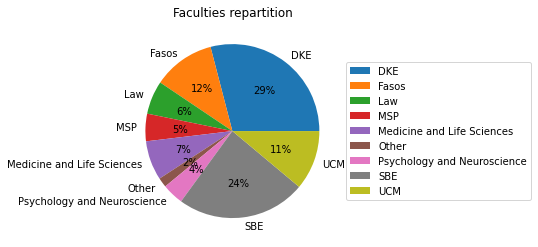

In [ ]:
fac = ['DKE','Fasos','Law','MSP','Medicine and Life Sciences','Other' ,'Psychology and Neuroscience' ,'SBE' ,'UCM']
plt.pie(df.groupby(['fac']).size(), labels = fac, autopct='%1.0f%%')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Faculties repartition')
plt.show()

We believe this repartition of students is satisfactory as all faculties are represented having a decent amount of participants in each. The only thing one could criticize is the fact that there is huge amount of responses from DKE student altough it is not a large faculty. 

This bias may impact plots of each faculty. This is the reason why, in every histogram showing the distribution of the faculties, we normalize by dividing each value of a faculty by the total number of students in it.

To see the difference and the impact of our unbalanced dataset in the normalized histogram, you can comment the lines:

    for col in CrosstabResult:
      CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()


Let's show the values of the GPA using a boxplot.

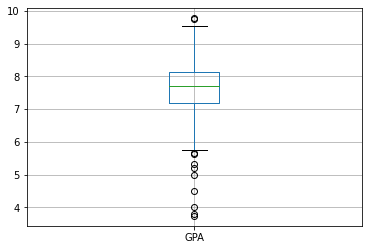

In [ ]:
boxplot = df.boxplot(column=['GPA'])  

We see in this boxplot that students have a GPA between approximately 5.8 and 9.6. The values below or above are considered as outliers. The median is about 7.7 and Q1=7.1 and Q3=8.1.

Then, we would like to see the distributions of the students' alcohol consumption on weekdays and weekend using histograms. We expect to see that globally students drink more during the weekends than weekdays.

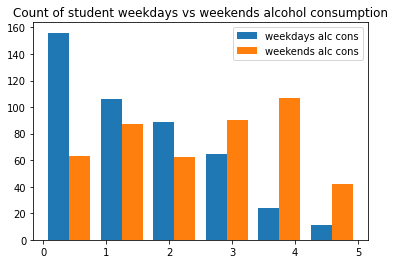

In [ ]:
plt.hist([df['weekdays_alc_cons'], df['weekends_alc_cons']], 6, label=['weekdays alc cons', 'weekends alc cons'])
plt.legend()
plt.title('Count of student weekdays vs weekends alcohol consumption')
plt.show()

Indeed, in this plot we can observe that students tend to drink more often during weekends than weekdays. If you take a look at the blue bars you will see that their height decreases from left to right, meaning that many students don't drink and a very few drink every day. The opposite phenomenom can be observe for weekends, meaning that many people drink every day during weekends and only a few don't drink at all.

We would like to see, what the distribution of the alcohol consumption during the week vs the drunk frequency looks like. 
Note that we must normalize the histograms in order to avoid bias. (This will be done for the rest of the graphs).

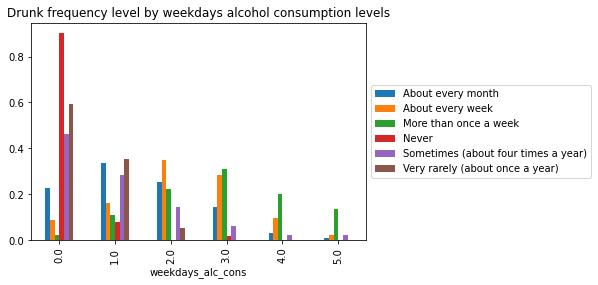

In [ ]:
CrosstabResult=pd.crosstab(index=df['weekdays_alc_cons'],columns=df['drunk_freq'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()

CrosstabResult.plot.bar();
plt.title("Drunk frequency level by weekdays alcohol consumption levels")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In this graph, we observe that students who never drink during weekdays (x-axis=0) tend to never be drunk (red bar). While as of level 3 (x-axis>=3), we observe that many students tend to be drunk really often (green bar).

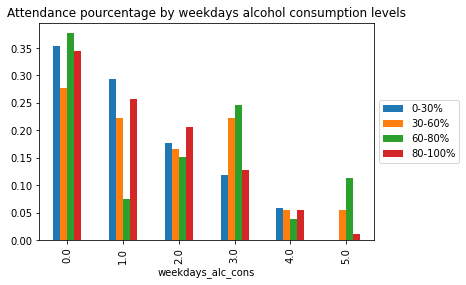

In [ ]:
CrosstabResult=pd.crosstab(index=df['weekdays_alc_cons'],columns=df['attendance_prct'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()

CrosstabResult.plot.bar()
plt.title("Attendance pourcentage by weekdays alcohol consumption levels")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

From this graph, we could interpret that the alcohol consumption during the weekdays does not influence much the class attendance since we do not see a high amount of blue and orange bars when the consumption increases. The distribution is diversified in every category.

Here under we represent a normalized histogram of the students' weekdays alcohol consumption for each faculty.

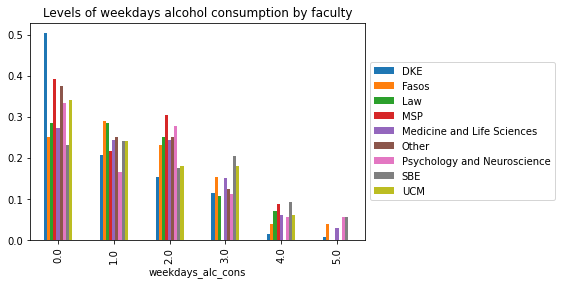

In [ ]:
CrosstabResult=pd.crosstab(index=df['weekdays_alc_cons'],columns=df['fac'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()

CrosstabResult.plot.bar()
plt.title("Levels of weekdays alcohol consumption by faculty")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In this plot, we can see that the majority of DKE students do not drink a lot on weekdays (more than 50% of DKE students chose of level of weekdays alcohol consumption lower than 3). On the opposite, most of the other faculties are on average except SBE that seem to especially like alcohol.

The next plot will show the drunk frequency by faculty.

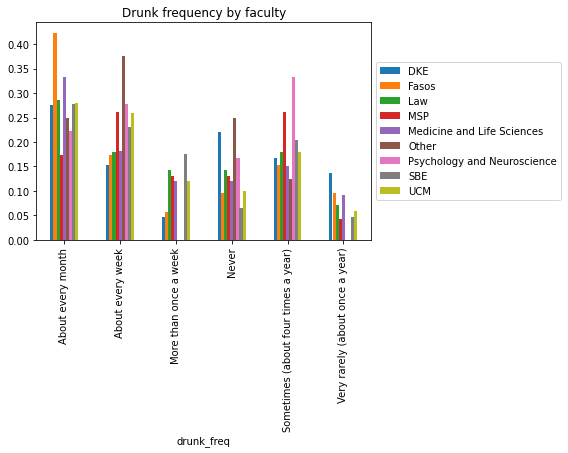

In [ ]:
CrosstabResult=pd.crosstab(index=df['drunk_freq'],columns=df['fac'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()

CrosstabResult.plot.bar()
plt.title("Drunk frequency by faculty")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

If we only look at the highest drunk frequency (which is more than once a week), then SBE would be the most populated. But if we look overall, we can conclude that the faculties that is the most often drink are SBE, MSP and UCM.

Next, we represent the various levels of weekdays alcohol consumption for the Bachelor versus the Master students.

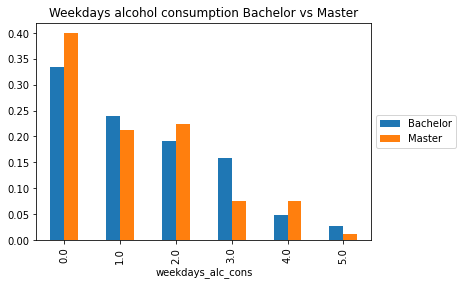

In [ ]:
CrosstabResult=pd.crosstab(index=df['weekdays_alc_cons'],columns=df['degree'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()

CrosstabResult.plot.bar()
plt.title("Weekdays alcohol consumption Bachelor vs Master")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Globally, we can see that Bachelor students tend to drink a little more alcohol than the Master students.

We normalize it because much more Bachelor students answered the surview compared to Master one.

Normalized histogram of the weekdays alcohol consumption on the hybrid, onsite and online students.

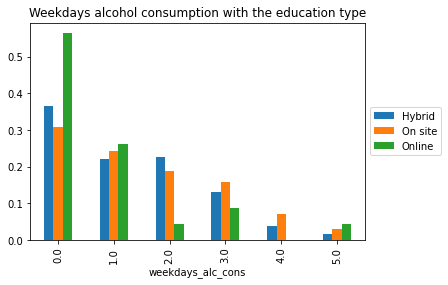

In [ ]:
CrosstabResult=pd.crosstab(index=df['weekdays_alc_cons'],columns=df['education_type'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()
  
CrosstabResult.plot.bar()
plt.title("Weekdays alcohol consumption with the education type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


The plot clearly tells us that the online students don't drink a lot while the majority of the onsite and hybrid students drink more.

Here under we represent a normalized histogram of the students' preferred drink for each faculty

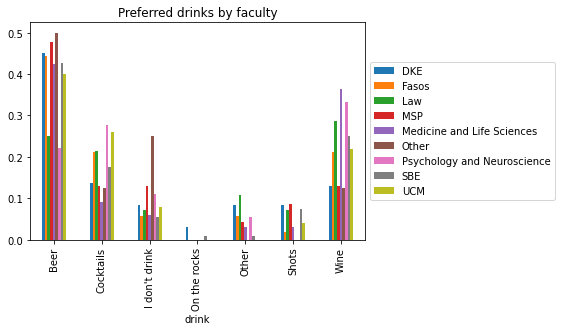

In [ ]:
CrosstabResult=pd.crosstab(index=df['drink'],columns=df['fac'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()

CrosstabResult.plot.bar()
plt.title("Preferred drinks by faculty")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

From this plot we can see that beer seem to be the preferred drink among all faculties, followed by wine, cocktails, shots and eventually drinks on the rocks. We also notice that many students (more or less the same amount in each faculty) simply do not drink.

Normalized histogram of the weekdays alcohol consumption and the resit frequency.


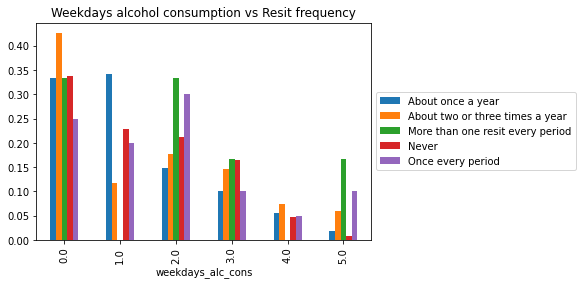

In [ ]:
CrosstabResult=pd.crosstab(index=df['weekdays_alc_cons'],columns=df['resit_freq'])
for col in CrosstabResult:
  CrosstabResult[col]=CrosstabResult[col]/CrosstabResult[col].sum()

CrosstabResult.plot.bar()
plt.title("Weekdays alcohol consumption vs Resit frequency")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


And clearly, the plot tells us that there is not a big link between those two variables. So, we can't say that drinking more alcohol impact our resit frequency.

Overplotting scatter plot of the students' GPA depending on their age filtered by their faculty. 

In [ ]:
import plotly.express as px

px.scatter(df, x='age',y = 'GPA', hover_name='fac', hover_data=['fac'], color='fac')

This plot is not representative at all since we can not distinguish the different users, due to the overlap of the points.

We will try to represent those informations with some other vizualisation techniques.

Distribution of GPA by faculty

In [ ]:
fac_names = [];
percentages_below6 = [];
percentages_betw_6_7 = [];
percentages_betw_7_8 = [];
percentages_betw_8_9 = [];
percentages_betw_9_10 = [];


for fac_name in df['fac'].unique():
  count_in_fac = df.loc[df['fac'] == fac_name].shape[0]
  #print(fac_name, ':', count_in_fac)
  fac_names.append(fac_name)
  count_below6 = df.loc[df['fac'] == fac_name].loc[df['GPA'] < 6].shape[0]
  #print(count_below6)
  percentage_below6 = count_below6/count_in_fac
  #print(percentage_below6)
  percentages_below6.append(percentage_below6)

  count_betw_6_7 = df.loc[df['fac'] == fac_name].loc[df['GPA'] >= 6].loc[df['GPA']<7].shape[0]
  #print('here', count_betw_6_7)
  percentages_betw_6_7.append(count_betw_6_7/count_in_fac)

  count_betw_7_8 = df.loc[df['fac'] == fac_name].loc[df['GPA'] >= 7].loc[df['GPA']<8].shape[0]
  percentages_betw_7_8.append(count_betw_7_8/count_in_fac)


  count_betw_8_9 = df.loc[df['fac'] == fac_name].loc[df['GPA'] >= 8].loc[df['GPA']<9].shape[0]
  percentages_betw_8_9.append(count_betw_8_9/count_in_fac)

  count_betw_9_10 = df.loc[df['fac'] == fac_name].loc[df['GPA'] >= 9].loc[df['GPA']<=10].shape[0]
  percentages_betw_9_10.append(count_betw_9_10/count_in_fac)

# Build new dataframe with the percentages for each range
data = {'Faculty': fac_names,
        'GPA<6': percentages_below6,
        '6<=GPA<7': percentages_betw_6_7,
        '7<=GPA<8': percentages_betw_7_8,
        '8<=GPA<9': percentages_betw_8_9,
        '9<=GPA<=10': percentages_betw_9_10}
 
distrib_gpa_per_fac = pd.DataFrame(data)
distrib_gpa_per_fac.set_index('Faculty', inplace=True)


distrib_gpa_per_fac

,GPA<6,6<=GPA<7,7<=GPA<8,8<=GPA<9,9<=GPA<=10
Faculty,,,,,
Psychology and Neuroscience,0.055556,0.055556,0.333333,0.555556,0.000000
SBE,0.027778,0.083333,0.370370,0.388889,0.129630
DKE,0.045802,0.114504,0.450382,0.328244,0.061069
UCM,0.000000,0.000000,0.720000,0.280000,0.000000
Law,0.000000,0.250000,0.464286,0.285714,0.000000
MSP,0.000000,0.043478,0.652174,0.304348,0.000000
Fasos,0.038462,0.115385,0.596154,0.250000,0.000000
Other,0.000000,0.000000,0.500000,0.375000,0.125000
Medicine and Life Sciences,0.030303,0.212121,0.636364,0.121212,0.000000


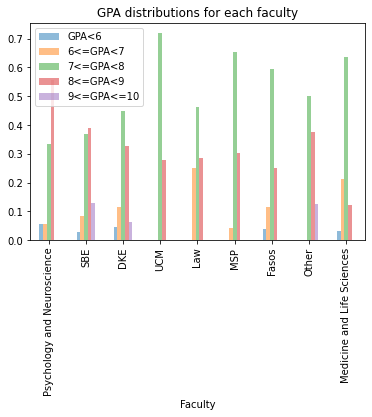

In [ ]:
fig = distrib_gpa_per_fac.plot.bar(alpha = 0.5)
fig.set_title('GPA distributions for each faculty');
plt.show();

From this plot, we can say that for each faculty, most GPA's seem to range from 7 to 8. The only exceptions are SBE and Psychology: in SBE most GPA's range from 7 to 9, and in Psychology most GPA's seem to range from 8 to 9 which makes this faculty the one with the highest GPA average according to our dataset.

Plot of the averaged GPA depending on the weekdays alcohol consumption of the students filtered by their faculty.

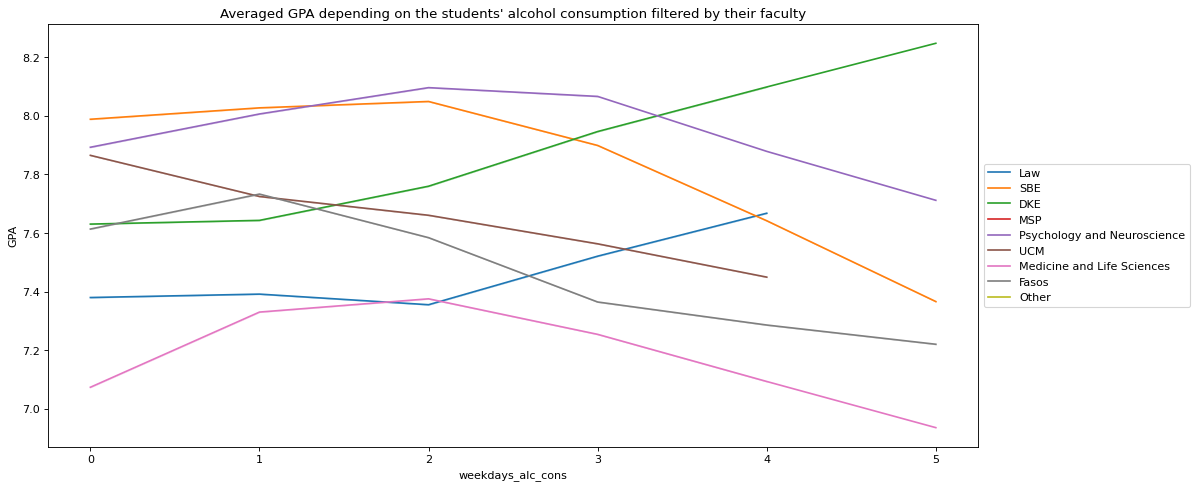

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
facs = {'Psychology and Neuroscience','Medicine and Life Sciences','SBE','DKE','UCM','Law','MSP','Fasos','Other'}

figure(figsize=(15, 7), dpi=80)

x = 'weekdays_alc_cons'

for i in facs:
  xobs = df[x].loc[(df['fac'] == i) & (df[x] < 30)]
  yobs = df['GPA'].loc[(df['fac'] == i) & (df[x] < 30)]

  ysmooth = lowess(yobs, xobs, return_sorted=False, frac=1./1.1)
  yobs = df['GPA'].loc[(df['fac'] == i) & (df[x] < 30)]
  sns.lineplot(xobs, ysmooth, label=i)

plt.ylabel("GPA")
plt.xlabel(x)
plt.title('Averaged GPA depending on the students\' alcohol consumption filtered by their faculty')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In the plot above, we observe that the more students drink, the lower is their GPA, except for the DKE and Medecine and Life Sciences faculties.

So, could we say that drinking alcohol impact our GPA ? (not enough)

Plot of the distribution of the GPA per weekdays alcohol consumption.

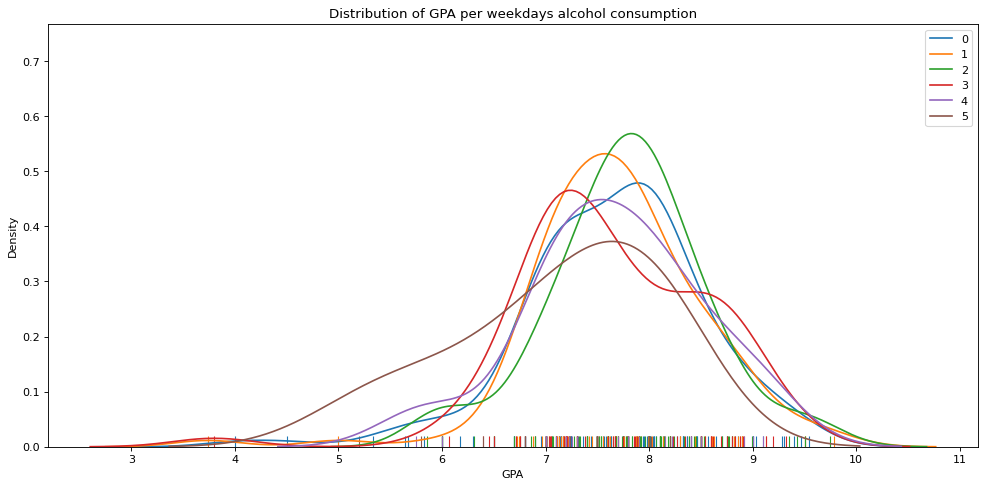

In [ ]:
df_zero = df['GPA'].loc[df['weekdays_alc_cons'] == 0]
df_one = df['GPA'].loc[df['weekdays_alc_cons'] == 1]
df_two = df['GPA'].loc[df['weekdays_alc_cons'] == 2]
df_three = df['GPA'].loc[df['weekdays_alc_cons'] == 3]
df_four = df['GPA'].loc[df['weekdays_alc_cons'] == 4]
df_five = df['GPA'].loc[df['weekdays_alc_cons'] == 5]


conso  = [df_zero, df_one, df_two, df_three, df_four, df_five]
cons = [0, 1, 2, 3, 4, 5]

figure(figsize=(15, 7), dpi=80)

for f in range(len(conso)):
  sns.distplot(conso[f],label = cons[f], hist = False, rug = True)
plt.legend()
plt.title('Distribution of GPA per weekdays alcohol consumption')
plt.show()

In this plot, we see that there is no real link between the alcohol consumption and the GPA. Indeed, we could think that the less we drink, the better our grades, but we see that the highest density is from the second group, then the third. Therefore, we can't make any conclusions regarding a so called coorelation between those two variables.

For the third research question, we are wondering which features have the biggest impact on the GPA. To do so, we will compute the feature importance.

## Analysis methods


In [ ]:
df.isnull().sum(axis = 0)

age                     1
sex                     0
country                 0
fac                     0
degree                  0
                       ..
('drink', '_')_Shots    0
('drink', '_')_Wine     0
idxl_drunk_freq         0
idxl_attendance_prct    0
idxl_resit_freq         0
Length: 99, dtype: int64

Only the age column has NaN, we will change it with the mean of the column

In [ ]:
df.fillna(df.mean(), inplace = True)

### Prediction of the weekdays alcohol consumption

#### Split dataset into training and test set

Second prediction could be idxl_drunk_freq, to see the results uncomment the target

In [ ]:
target = 'weekdays_alc_cons'
#target = 'idxl_drunk_freq'
#drop categorical features
X = df.drop(columns=[target,'drunk_freq','resit_freq','attendance_prct','sex','country','fac','degree','education_type','fav_studyplace','study_env','drink'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 97)
X.head()

,age,living_area,classes_hperweek,sorority,study_hperweek,GPA,weekends_alc_cons,active,bin_degree,"('sex', '_')_F","('sex', '_')_M","('sex', '_')_Other","('country', '_')_Armenia","('country', '_')_Australia","('country', '_')_Austria","('country', '_')_Belarus","('country', '_')_Belgium","('country', '_')_Brazil","('country', '_')_Bulgaria","('country', '_')_Canada","('country', '_')_China","('country', '_')_Croatia","('country', '_')_Curacao","('country', '_')_Cyprus","('country', '_')_Denmark","('country', '_')_England","('country', '_')_Estonia","('country', '_')_Finland","('country', '_')_France","('country', '_')_Germany","('country', '_')_Greece","('country', '_')_Hungary","('country', '_')_India","('country', '_')_Iran","('country', '_')_Ireland","('country', '_')_Italy","('country', '_')_Kenya","('country', '_')_Latvia","('country', '_')_Luxembourg","('country', '_')_Madagascar","('country', '_')_Mexico","('country', '_')_Moldova","('country', '_')_Montenegro","('country', '_')_NA","('country', '_')_Netherlands","('country', '_')_New Zealand","('country', '_')_Norway","('country', '_')_Panama","('country', '_')_Poland","('country', '_')_Portugal","('country', '_')_Qatar","('country', '_')_Romania","('country', '_')_Russia","('country', '_')_Sint Maarten","('country', '_')_Slovakia","('country', '_')_South Africa","('country', '_')_South Korea","('country', '_')_Spain","('country', '_')_Sweden","('country', '_')_Switzerland","('country', '_')_Tunisia","('country', '_')_Turkey","('country', '_')_USA","('country', '_')_Ukraine","('country', '_')_Vietnam","('country', '_')_Yemen","('education_type', '_')_Hybrid","('education_type', '_')_On site","('education_type', '_')_Online","('fav_studyplace', '_')_Bar","('fav_studyplace', '_')_Café","('fav_studyplace', '_')_Home","('fav_studyplace', '_')_Library/learning space","('fav_studyplace', '_')_Other","('study_env', '_')_Alone","('study_env', '_')_Mix","('study_env', '_')_With friends","('drink', '_')_Beer","('drink', '_')_Cocktails","('drink', '_')_I don't drink","('drink', '_')_On the rocks","('drink', '_')_Other","('drink', '_')_Shots","('drink', '_')_Wine",idxl_drunk_freq,idxl_attendance_prct,idxl_resit_freq
0,22.0,0,2,0,1,7.20,0.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,3,2
2,19.0,1,1,0,1,4.50,1.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,2,1
3,20.0,0,1,1,1,6.00,4.0,5.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,5,3,3
4,20.0,1,2,0,2,7.50,3.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,3,3,0
5,20.0,0,3,0,4,8.03,3.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,3,3,0


#### TEST ON EBM

In [ ]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

ebm = ExplainableBoostingClassifier(random_state=25)
ebm.fit(X_train, y_train)

ebm_global = ebm.explain_global()
show(ebm_global)

ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

Experiment basic model

In [ ]:
#test current dataset with XGBClassifier

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

wac_acc_XGBCl = accuracy_score(y_test, y_predicted)
print("Accuracy:", wac_acc_XGBCl)
print(classification_report(y_test, y_predicted))

Accuracy: 0.45054945054945056
              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64        31
         1.0       0.35      0.32      0.33        25
         2.0       0.50      0.37      0.42        19
         3.0       0.27      0.36      0.31        11
         4.0       0.00      0.00      0.00         3
         5.0       1.00      0.50      0.67         2

    accuracy                           0.45        91
   macro avg       0.45      0.37      0.39        91
weighted avg       0.46      0.45      0.45        91



#### **TESTS ON DIMENSION REDUCTION**

Recursive Feature Elimination (RFE)

Since our dataset used in the model is composed of 85 features, we decided to use RFE to decrease the number of columns until the local model (XBGClassifier in our case) is optimal depending on the features selected.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, classification_report

classifier = xgb.XGBClassifier()
rfecv = RFECV(
    estimator=classifier,
    min_features_to_select=1,
    step=3,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=XGBClassifier(), n_jobs=-1, scoring='r2', step=3)

We kept 42 features out of the 87


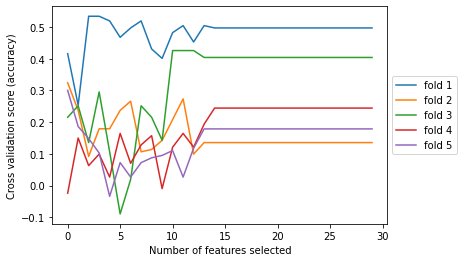

In [ ]:
#keep selected features by RFE
RFE_X_train = X_train[X_train.columns[rfecv.support_]]
RFE_X_test = X_test[X_test.columns[rfecv.support_]]

#print(RFE_X_train.head())

print('We kept',RFE_X_train.shape[1],'features out of the',X_train.shape[1])
min_features_to_select = 1

plt.figure()
lines = []
for i in range(rfecv.grid_scores_.shape[1]):
  lines.append(plt.plot(rfecv.grid_scores_[:,i]))

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.legend(lines,labels = ['fold 1', 'fold 2', 'fold 3','fold 4', 'fold 5'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#test current reduced dataset with XGBClassifier

clf = xgb.XGBClassifier()
clf.fit(RFE_X_train, y_train)
y_predicted = clf.predict(RFE_X_test)

wac_acc_RFE_XGBCl = accuracy_score(y_test, y_predicted)
print("Accuracy:", wac_acc_RFE_XGBCl)
print(classification_report(y_test, y_predicted))

Accuracy: 0.46153846153846156
              precision    recall  f1-score   support

         0.0       0.59      0.71      0.65        31
         1.0       0.39      0.36      0.37        25
         2.0       0.43      0.32      0.36        19
         3.0       0.29      0.36      0.32        11
         4.0       0.00      0.00      0.00         3
         5.0       1.00      0.50      0.67         2

    accuracy                           0.46        91
   macro avg       0.45      0.37      0.40        91
weighted avg       0.46      0.46      0.45        91



We have noticed that many people (282, more than half of our records) have a GPA above 7.5. Which makes it hard for our decision tree to predict whether the GPA is high or low for a certain student. By setting the threshold for having a high GPA to 8.2 (only 112 records), we can reach higher accuracies. I will also try with even higher threshold, such as 9 (only 24 records).

#### **ALGO FOR MULTI CLASS CLUSTERING**

XGBoost Regressor

In [ ]:
clf = xgb.XGBRegressor()
clf.fit(RFE_X_train, y_train)
y_predicted = clf.predict(RFE_X_test)
predictions = [round(value) for value in y_predicted]

wac_acc_RFE_XGBReg = accuracy_score(y_test, predictions)
print("Accuracy:", wac_acc_RFE_XGBReg)
print(classification_report(y_test, predictions))

[20:52:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 0.45054945054945056
              precision    recall  f1-score   support

         0.0       0.83      0.48      0.61        31
         1.0       0.35      0.48      0.41        25
         2.0       0.39      0.58      0.47        19
         3.0       0.30      0.27      0.29        11
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2

    accuracy                           0.45        91
   macro avg       0.31      0.30      0.30        91
weighted avg       0.50      0.45      0.45        91



SVM classifier

In [ ]:
from sklearn.svm import SVC 

clf = SVC(kernel='linear') 

# fitting x samples and y classes 
clf.fit(RFE_X_train, y_train)
y_predicted = clf.predict(RFE_X_test)

wac_acc_RFE_SVC = accuracy_score(y_test, y_predicted)
print("Accuracy:", wac_acc_RFE_SVC)
print(classification_report(y_test, y_predicted))

Accuracy: 0.43956043956043955
              precision    recall  f1-score   support

         0.0       0.54      0.61      0.58        31
         1.0       0.36      0.32      0.34        25
         2.0       0.43      0.47      0.45        19
         3.0       0.33      0.36      0.35        11
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2

    accuracy                           0.44        91
   macro avg       0.28      0.30      0.29        91
weighted avg       0.41      0.44      0.43        91



#### Feature Importance

In this section, we will try to see which features are the most important to be able to predict our target. 

The code comes from the slides given in class.

We will try to see the feature importance with logistic regression (for this we have to use our transformed dataset because we have categorical features)

In [ ]:
model = LogisticRegression(random_state=10)
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Accuracy on train:  ' + str(accuracy_score(y_train, y_train_pred)))

print('Accuracy on test:   ' + str(accuracy_score(y_test, y_test_pred)))

Accuracy on train:  0.6277777777777778
Accuracy on test:   0.42857142857142855


In [ ]:
X_train.shape

(360, 87)

In [ ]:
cols_index = []

for i in range(87):
  string = 'x'+'_'+str(i)
  cols_index.append(string)
cols_index.append('y')

In [ ]:
d = {'feature': X_train.columns, 'coefficient': model.coef_[0], 'odds': np.exp(model.coef_[0])}
df_new = pd.DataFrame(index=cols_index[:-1], data=d)
df_new.sort_values(by='odds', ascending=False)

,feature,coefficient,odds
x_79,"('drink', '_')_I don't drink",0.761751,2.142023
x_1,living_area,0.739779,2.095473
x_57,"('country', '_')_Spain",0.695929,2.005572
x_72,"('fav_studyplace', '_')_Library/learning space",0.647063,1.909924
x_75,"('study_env', '_')_Mix",0.573840,1.775070
...,...,...,...
x_44,"('country', '_')_Netherlands",-0.744436,0.475002
x_77,"('drink', '_')_Beer",-0.855660,0.425003
x_16,"('country', '_')_Belgium",-0.861836,0.422386
x_3,sorority,-1.107729,0.330308


### Prediction using Multiple Correspondance Analysis

1. **Correspondance analysis**: You should be using correspondence analysis when you want to analyse a contingency table. In other words you want to analyse the dependencies between two categorical variables

2. **Multiple correspondence analysis** (MCA) is an extension of correspondence analysis (CA). It should be used when you have more than two categorical variables. The idea is simply to compute the one-hot encoded version of a dataset and apply CA on it.

Since our dataset is mainly composed with categorical values, we will MCA and see if we can have better predictions

Source: https://github.com/MaxHalford/prince



##### Get the data from scratch and make some preprocessing on it

In [ ]:
df_mca = pd.DataFrame(pd.read_excel("student_alcohol_cons.xlsx"));
df_mca.drop('Horodateur',axis=1,inplace=True);

df_mca.rename(columns={'How old are you?': 'age', 'What is your sex?': 'sex', 
                        'Where are you from? (country)':'country','What is your faculty?':'fac',
                      'Are you a Master or a Bachelor student ?':'degree','Where do you live':'living_area',
                        'Rough number of hours of classes per week':'classes_hperweek','Percentage of classes attended':'attendance_prct',
                      'Are you part of a fraternity/sorority?':'sorority','Which type of education are you following?':'education_type',
                      'Which type of education are you following?':'education_type','How many hours per week do you spend studying?':'study_hperweek',
                      'What is your current GPA? (out of 10)':'GPA','How often do you get resits ?':'resit_freq','What is your preferred place to study at?':'fav_studyplace',
                      'Environment of study':'study_env','What is your alcohol consumption during the weekdays (Mon, Tue, Wed, Thu)?':'weekdays_alc_cons',
                      'What is your alcohol consumption during the weekends (Fri, Sat, Sun)?':'weekends_alc_cons','How often do you get drunk ?':'drunk_freq',
                      'Drink of choice':'drink','How physically active are you?':'active'},inplace=True);

df_mca['country'] = df_mca['country'].replace({'Romania ': 'Romania', 'Netherlands ': 'Netherlands', 
                      'The Netherlands': 'Netherlands', 'the Netherlands': 'Netherlands',
                      'Belgium ': 'Belgium', 'Germany ': 'Germany', 'The Netherlands ': 'Netherlands',
                      'Bulgaria ':'Bulgaria', 'Luxembourg ': 'Luxembourg', 'germany': 'Germany',
                      'German': 'Germany', 'belgium': 'Belgium', 'italy': 'Italy',
                      'Republic of Moldova': 'Moldova', 'Greece ': 'Greece', 'The netherlands': 'Netherlands',
                       'Holland': 'Netherlands', 'Belgiû': 'Belgium', 'Yemen ': 'Yemen', 'Korea ': 'South Korea',
                       'Poland ': 'Poland', 'South African': 'South Africa', 'german': 'Germany',
                       'South Africa ': 'South Africa', 'Italy ': 'Italy', 'Norway ': 'Norway',
                       'Cyprus ': 'Cyprus', 'United States': 'USA', 'France ': 'France',
                       'Montenegro ': 'Montenegro', 'germany ': 'Germany', 'I am disappointed by your methodology.': 'NA',
                       'Netherlandds': 'Netherlands', 'poland': 'Poland', 'france ': 'France',
                       'Canada ': 'Canada', 'New Zealand ': 'New Zealand', 'Denmark ': 'Denmark',
                       'Dutch': 'Netherlands', 'BE': 'Belgium', 'Germany/Turkey': 'Germany', ' German': 'Germany'});

df_mca.groupby(['country']).size();

df_mca.drop(['age', 'GPA'], axis = 1, inplace = True)



#####Dimension Reduction

In [ ]:
mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42 )

mca.fit(df);
mca_df = mca.fit_transform(df); #columns 

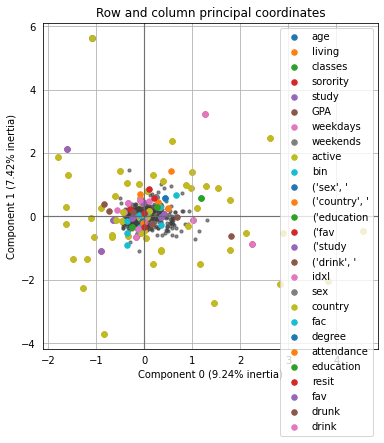

In [ ]:
ax = mca.plot_coordinates(X=df, ax=None, figsize=(6, 6), show_row_points=True,  row_points_size=10, show_row_labels=False, show_column_points=True, column_points_size=30, show_column_labels=False, legend_n_cols=1 )

In [ ]:
eigenvalues = mca.eigenvalues_
inertia = mca.total_inertia_
explained_inertia = mca.explained_inertia_

print('Eigenvalues: ', eigenvalues)
print('Inertia: ', inertia)
print('Explained inertia: ', explained_inertia)

Eigenvalues:  [0.08397907624077133, 0.06743509106429607]
Inertia:  0.9090909090909091
Explained inertia:  [0.09237698386484847, 0.07417860017072568]


In [ ]:
principal_df = pd.DataFrame(data=mca_df)
principal_df.head()

,0,1
0,0.357451,-0.159918
2,0.376401,0.094196
3,-0.313213,0.203437
4,0.121423,0.487574
5,-0.153262,-0.003800


Now we will try to predict the same things as before with those two new columns

##### Prediction of weekdays alcohol consumption

In [ ]:
principal_df['weekdays_alc_cons'] = df['weekdays_alc_cons']

target = 'weekdays_alc_cons'
X = principal_df.drop(['weekdays_alc_cons', 'drunk_freq'], axis = 1)
y = principal_df[target]

X_train_mca, X_test_mca, y_train_mca, y_test_mca = train_test_split(X, y, test_size = 0.20, random_state = 97)
X.head()

,0,1
0,0.357451,-0.159918
2,0.376401,0.094196
3,-0.313213,0.203437
4,0.121423,0.487574
5,-0.153262,-0.003800


In [ ]:
clf = xgb.XGBClassifier()
clf.fit(X_train_mca, y_train_mca)
y_predicted = clf.predict(X_test_mca)

wac_acc_PCA_XGBCl = accuracy_score(y_test_mca, y_predicted)
print("Accuracy:", wac_acc_PCA_XGBCl)
print(classification_report(y_test_mca, y_predicted))

Accuracy: 0.4065934065934066
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65        31
         1.0       0.37      0.44      0.40        25
         2.0       0.25      0.16      0.19        19
         3.0       0.10      0.09      0.10        11
         4.0       0.00      0.00      0.00         3
         5.0       1.00      0.50      0.67         2

    accuracy                           0.41        91
   macro avg       0.39      0.31      0.33        91
weighted avg       0.40      0.41      0.40        91



### GPA Prediction - Feature Importance - Question 3

In this section, we will try to see which features are the most important to be able to predict our target (i.e. the GPA). 

The code comes from the slides given in class.

We will try to see the feature importance with logistic regression (for this we have to use our transformed dataset because we have categorical features)

In [ ]:
df.fillna(df.mean(), inplace = True)

In [ ]:
df = df.astype({"GPA": str}, errors='raise') 
target = 'GPA'
#drop categorical features
X = df.drop(columns=[target,'drunk_freq','resit_freq','attendance_prct','sex','country','fac','degree','education_type','fav_studyplace','study_env','drink'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 97)

In [ ]:
model = LogisticRegression(random_state=10)
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Accuracy on train:  ' + str(accuracy_score(y_train, y_train_pred)))

print('Accuracy on test:   ' + str(accuracy_score(y_test, y_test_pred)))

Accuracy on train:  0.6694444444444444
Accuracy on test:   0.04395604395604396


In [ ]:
cols_index = []

for i in range(87):
  string = 'x'+'_'+str(i)
  cols_index.append(string)
cols_index.append('y')

In [ ]:
d = {'feature': X_train.columns, 'coefficient': model.coef_[0], 'odds': np.exp(model.coef_[0])}
df_new = pd.DataFrame(index=cols_index[:-1], data=d)
df_new.sort_values(by='odds', ascending=False)

,feature,coefficient,odds
x_86,idxl_resit_freq,1.020744,2.775259
x_2,classes_hperweek,0.574449,1.776151
x_18,"('country', '_')_Bulgaria",0.379147,1.461038
x_78,"('drink', '_')_Cocktails",0.297247,1.346148
x_72,"('fav_studyplace', '_')_Library/learning space",0.226117,1.253723
...,...,...,...
x_71,"('fav_studyplace', '_')_Home",-0.223929,0.799372
x_6,weekends_alc_cons,-0.277907,0.757367
x_5,weekdays_alc_cons,-0.349323,0.705165
x_7,active,-0.605378,0.545868


###Analysis methods results###

In [ ]:
d = [[wac_acc_XGBCl,df_acc_XGBCl],[wac_acc_RFE_XGBCl,df_acc_RFE_XGBCl],[wac_acc_RFE_XGBReg,df_acc_RFE_XGBReg],[wac_acc_RFE_SVC,df_acc_RFE_SVC],[wac_acc_PCA_XGBCl,df_acc_PCA_XGBCl]]
results = pd.DataFrame(data = d, columns = ['Weekdays alcohol consumption','Drunk frequency'], index = ['XGBClassifier','RFE XGBClassifier','RFE XGBRegressor','RFE SVC','MCA XGBClassifier'])
print(results)


                   Weekdays alcohol consumption  Drunk frequency
XGBClassifier                          0.450549         0.450549
RFE XGBClassifier                      0.461538         0.450549
RFE XGBRegressor                       0.450549         0.417582
RFE SVC                                0.439560         0.494505
MCA XGBClassifier                      0.406593         0.483516


Above, we observe the accuracy we obtained for each model experimented (see more details below each cell).

First of all, the accuracies are clearly very low. This can be explained by the fact that, firstly, our dataset could have contained more records and, seconldy, because there are no high correlations between our variables.

Indeed, after some experiments, we conclude that "weekends_alc_cons" and "drunk_freq" were the two features with the best results and understanding out of all the others.

As a trial, we initially tested a basic model (XGBClassifier) on both variables and deduced that a dimension reduction was strongly needed since we had 85 features (including the dummies). 
For that, we implemented the Recursive Feature Elimination and the Multiple Correspondence Analysis, which are two well-different techniques. While the first one simply removes some features until reaching optimality of a local model, the second also changes the data with one hot encoding, and then apply correspondance analysis on it. Which allows us to analyse the dependencies between different variables.

After that, we tested the new set of features on different kinds of model (XGBClassifier, XGBRegressor and Support Vector Machine).

To improve our results, we could get much more data and test other algorithms such as a Deep Learning model for example.

## Ethical considerations

**1. Provide Datasheets for the Dataset (see portal)** See excel sheet + link to survey on Canvas submission

**2. How did you get the data (legally...)?** We collected it ourselves via Google Form. 

**3. Did you check the source?** Our source are the users (directly).

**4. Are there considerations about the analysis you made?** Yes, we should respect some rules in order to comply with the GDPR law. In the next cell, we will explain the issue we faced.

**5. Did you have to make decisions that affect the analysis?** We decided not to ask about sensitive informations to the surveyed users such as their religion for instance (religion might be the reason why someone does not drink alcohol).

**6. What are the limitations of your analysis and your conclusions?** We have been limited by the fact that we don't have access to all email addresses of the students of UM. We therefore had to use our contacts which are mainly belgian students or students from DKE. For the conclusions, see next section!

**7. Who are the stakeholders of your project?** Mainly students who are interested in knowing whether there is any link between consuming alcohol and academic success. It might also concern university staff or parents for the same reason.

**8. Who can benefit from this project, who can be harmed, who is excluded, etc.** The people who could benefit from this project are curious students, parents and Maastricht University staff. Nobody should be harmed or excluded by our study.

In this section, we will describe the issue we faced due to extensively sharing our Google Form survey. 

During our research we have faced a complaint coming from UM central. Apparently, we did not respect the GDPR rule in our survey. We decided to investigate this rule:

According to the following source https://gdpr.eu/what-is-gdpr/, the GDPR is about Europe’s data privacy and security law. "Briefly the 7 points to be respected. If you process data, you have to do so according to seven protection and accountability principles outlined in Article 5.1-2:
1. Lawfulness, fairness and transparency — Processing must be lawful, fair, and transparent to the data subject.
2. Purpose limitation — You must process data for the legitimate purposes specified explicitly to the data subject when you collected it.
3. Data minimization — You should collect and process only as much data as absolutely necessary for the purposes specified.
4. Accuracy — You must keep personal data accurate and up to date.
5. Storage limitation — You may only store personally identifying data for as long as necessary for the specified purpose.
6. Integrity and confidentiality — Processing must be done in such a way as to ensure appropriate security, integrity, and confidentiality (e.g. by using encryption).
7. Accountability — The data controller is responsible for being able to demonstrate GDPR compliance with all of these principles."

Indeed, in our survey, we asked personal data to students of UM. Although we did not force them to reply to the survey of course, we did not mentioned some information that they should have known. 

What we should have done:
- Describe the purpose of this research and how the data will be used.
- Precise how long the data will be stored (i.e. when they will be deleted).
- Precise that their data will be kept confidential (or precise who will be able to access them).

(This should have been described at the beginning of the survey)



## Conclusion

In this section, we will answer the research questions stated at the beginning of the notebook. Those are:

-**How impactful is a student's alcohol consumption on his academic success ?** \
  -**How is the alcohol consumption distributed over the different faculties within Maastricht University?** \
  -**What features influence the student's academic success ? (In this case the GPA)** \

Helped by the explorative data analysis, we are now able to answer them.

-------------------------------------------------------------------------------

**First question**

Concerning the first one, the plots showing off the distribution of specifc features such as the attendance pourcentage or the resit frequency depending on the alcohol consumption (AC) could not clearly explain a correlation between them. Moreover, this can also be explained by the fact that the model predicting the AC could not have a high accuracy. If there were links between this target and some other variables, it would be much higher.\
Nevertheless, the graph plotting the averaged GPA depending on the students' AC filtered by their faculty did show some kind of result. As a matter of fact, the majority of the faculties students' GPA decreases with a high AC. But, this evidence is not big enough to say that the AC impacts a student's academic success.
Another point we could raise would be regarding the feature importance that we computed earlier. Because of them, we can check which features have the most importance when predicting the alcohol consumption and the drunk frequency. We can observe that in both predictions, the most important values are not related with the study environment (both in the EBM, and the feature importance algorithm). Once again, this proves that there is not a clear relationship between academic success and student's alcohol consumption.

-------------------------------------------------------------------------------

**Second question**

The aim of this question is to see how the alcohol consumption is distributed within each faculty. 
From the different plots, we can see that the faculty that has the highest consumption of alcohol during weekdays and weekends is SBE. Indeed, we can see that they have the highest value for the 3 highest frequencies of drinking (from 3 to 5). If we only look at the highest drunk frequency, which is more than once a week, then SBE would be the most populated. But if we look at the overall, we can conclude that the faculties that are the most often drunk are SBE, MSP and UCM. Globally, we can say that SBE is potentially the faculty that drinks the most. It is interesting to compare this ranking with the GPA distribution over the faculties. The faculies that have the more relatively high GPAs are SBE and the faculty of Psychology and Neurosciences.

We can then check what is the prefered type of drinks. Globally, we observe a tendency to prefer beers for all faculties, followed by wine.

-------------------------------------------------------------------------------

**Third question**

Now, regarding the last question, which is about the features that influence the student's academic success, we can once again use the logistic regression to get the feature importance for the GPA. With this, we will be able to see what influences the most this value.

After having computed the table, we can see that the top features are the resit frequency, the number of classes per week, the country, the favorite type of drinks and the study place. We can thus see that only one of those features is related to alcohol. However,there is only 4% of accuracy on the test set. So for what it's worth, we say that there is no obvious relationship between alcohol and academic success. 
(One way of explainig this very bad result, would be first that the GPA is a continuous value (we had to change its type to be able to use it for the logistic regression) which sheds light on why it performs so bad. Then, because of the representation of the data with one hot encoding some informations might have been lost.


*Remark*: After looking a the results from the different feature importance algorithms, we noticed that because of the way we handled our data and how we fed it into the model, the results were surprising. For instance, if you're from Bulgaria then the importance is very high. This is because of our sample. We can understand that there is one person from Bulgaria that answered our survey and said that he had a high GPA. Thus, on this population, the sample is not large enough and then the conclusion could be biased because of this. We would classify someone from Bulgaria as having a high GPA but that is not necesseraly true.\
We can also raise the fact that EBM and feature importance did not compute the same ranking for the features. This can be explained by their different implementations. They do the same thing but not the same way, it is then not surprising that the results are different. However, in both cases, we can see that alcohol consumption is not related to the study environment.

**Take home message:**

The conclusion of our study is such that academic success is not directly correlated to alcohol consumption. We believe that overall academic performance depends on many many factors (some of them that haven't even been measured in our survey). Anyway, something to remember from this study is that students should not be too worried about their alcohol consumption as long as they get the work done one way or another.
